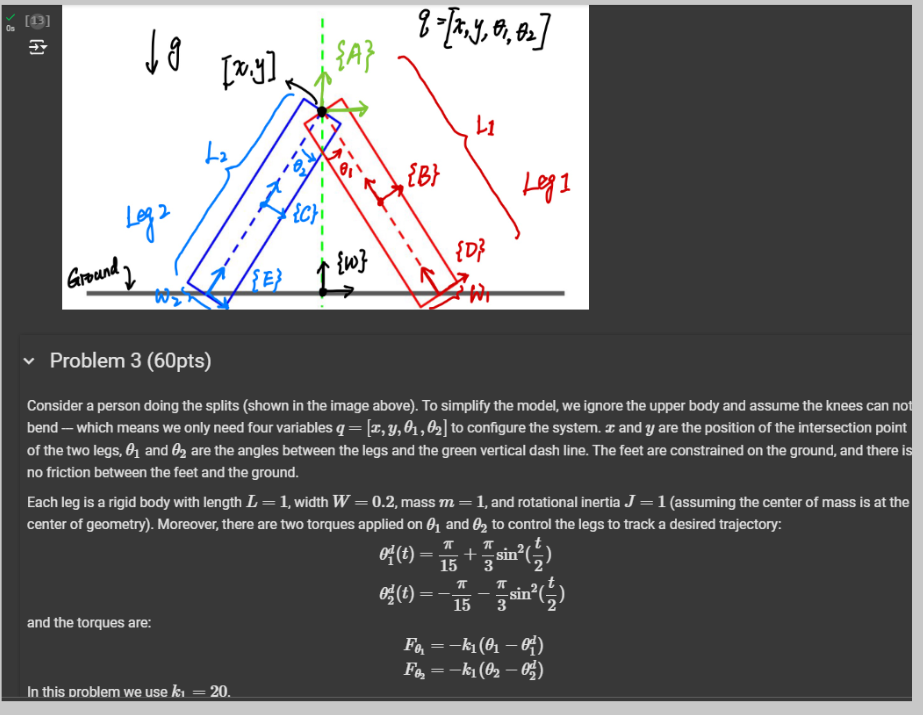

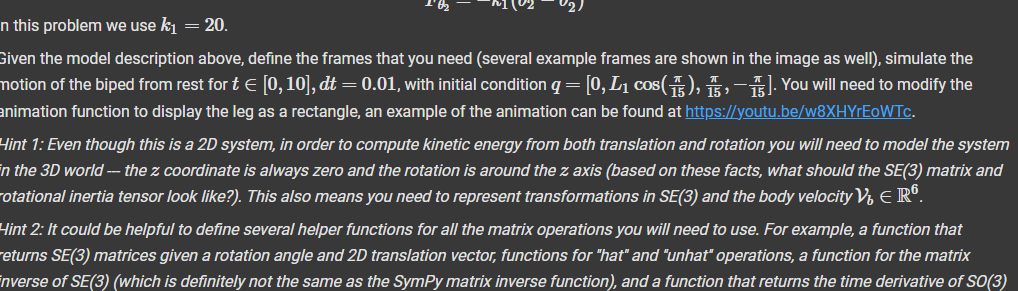

In [1]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/biped_simplified.jpg' width=600' height='350'></table>"))

In [2]:
##############################################################################################
# If you're using Google Colab, uncomment this section by selecting the whole section and press
# ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice
# LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
##############################################################################################
import sympy as sym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

In [3]:
# Declare variables
L1, W, m, J, g = sym.symbols('L_1 W m J g')
t = sym.symbols('t')
k1 = sym.symbols('k1')

# vars
x = sym.Function('x')(t)
y = sym.Function('y')(t)
theta1 = sym.Function(r'\theta_1')(t)
theta2 = sym.Function(r'\theta_2')(t)

# frames
g_wa = sym.Matrix([[1, 0, 0, x],
                   [0, 1, 0, y],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

r_ab = sym.Matrix([[sym.cos(theta1), -sym.sin(theta1), 0, 0],
                    [sym.sin(theta1), sym.cos(theta1), 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

p_ab = sym.Matrix([[1, 0, 0, 0],
                   [0, 1, 0, -L1/2],
                   [0, 0, 1, 0,],
                   [0, 0, 0, 1]])

g_ab = r_ab @ p_ab
g_wb = g_wa @ g_ab
print("g_wb is:")
display(g_wb)

# similarly, find g_wc
r_ac = sym.Matrix([[sym.cos(theta2), -sym.sin(theta2), 0, 0],
                   [sym.sin(theta2), sym.cos(theta2), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

p_ac = sym.Matrix([[1, 0, 0, 0],
                   [0, 1, 0, -L1/2],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

g_ac = r_ac @ p_ac
g_wc = g_wa @ g_ac

# find D and E
p_bd = sym.Matrix([[1, 0, 0, 0],
                    [0, 1, 0, -L1/2],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

g_wd = g_wb @ p_bd

p_ce = sym.Matrix([[1, 0, 0, 0],
                   [0, 1, 0, -L1/2],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

g_we = g_wc @ p_ce


# Constraints, these need to equal to zero
d_y = g_wd[1, 3]
e_y = g_we[1, 3]

# Find potential energy
PE = g_wb[1, 3] * m * g + g_wc[1,3] * m * g
print("Potential energy of the system is:")
display(PE)

# Kinetic energy

I_66 = sym.Matrix([[0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, J, 0, 0, 0],
                   [0, 0, 0, m, 0, 0],
                   [0, 0, 0, 0, m, 0],
                   [0, 0, 0, 0, 0, m]])
print("The inertia matrix of a single leg has:")
display(I_66)

r_wb = g_wb[0:3, 0:3]
p_wb = g_wb[0:3, 3]
r_wc = g_wc[0:3, 0:3]
p_wc = g_wc[0:3, 3]

w_wb = r_wb.T @ r_wb.diff(t)
w_wc = r_wc.T @ r_wc.diff(t)

v_wb = r_wb.T @ p_wb.diff(t)
v_wc = r_wc.T @ p_wc.diff(t)

V6_b = sym.Matrix([[w_wb[2,1]], [-w_wb[2,0]], [w_wb[1,0]], [v_wb[0]], [v_wb[1]], [v_wb[2]]])
V6_c = sym.Matrix([[w_wc[2,1]], [-w_wc[2,0]], [w_wc[1,0]], [v_wc[0]], [v_wc[1]], [v_wc[2]]])
print("The 6-vector velocity of frame B is:")
display(V6_b)
print("The 6-vector velocity of frame C is:")
display(V6_c)

# combine and fine KE

KE_b = 1/2 * V6_b.T @ I_66 @ V6_b
KE_c = 1/2 * V6_c.T @ I_66 @ V6_c
print("The kinetic energy of frame B is:")
display(KE_b)
print("The kinetic energy of frame C is:")
display(KE_c)

print("Total KE of the system:")
KE = KE_b + KE_c
display(KE)


g_wb is:


Matrix([
[cos(\theta_1(t)), -sin(\theta_1(t)), 0,  L_1*sin(\theta_1(t))/2 + x(t)],
[sin(\theta_1(t)),  cos(\theta_1(t)), 0, -L_1*cos(\theta_1(t))/2 + y(t)],
[               0,                 0, 1,                              0],
[               0,                 0, 0,                              1]])

Potential energy of the system is:


g*m*(-L_1*cos(\theta_1(t))/2 + y(t)) + g*m*(-L_1*cos(\theta_2(t))/2 + y(t))

The inertia matrix of a single leg has:


Matrix([
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, J, 0, 0, 0],
[0, 0, 0, m, 0, 0],
[0, 0, 0, 0, m, 0],
[0, 0, 0, 0, 0, m]])

The 6-vector velocity of frame B is:


Matrix([
[                                                                                                                                                                                      0],
[                                                                                                                                                                                      0],
[                                                                                        sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + cos(\theta_1(t))**2*Derivative(\theta_1(t), t)],
[(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*sin(\theta_1(t)) + (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*cos(\theta_1(t))],
[(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*cos(\theta_1(t)) - (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*sin(\theta_1(t))],
[                                                       

The 6-vector velocity of frame C is:


Matrix([
[                                                                                                                                                                                      0],
[                                                                                                                                                                                      0],
[                                                                                        sin(\theta_2(t))**2*Derivative(\theta_2(t), t) + cos(\theta_2(t))**2*Derivative(\theta_2(t), t)],
[(L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(y(t), t))*sin(\theta_2(t)) + (L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(x(t), t))*cos(\theta_2(t))],
[(L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(y(t), t))*cos(\theta_2(t)) - (L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(x(t), t))*sin(\theta_2(t))],
[                                                       

The kinetic energy of frame B is:


Matrix([[J*(0.5*sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + 0.5*cos(\theta_1(t))**2*Derivative(\theta_1(t), t))*(sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + cos(\theta_1(t))**2*Derivative(\theta_1(t), t)) + m*(0.5*(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*sin(\theta_1(t)) + 0.5*(L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*cos(\theta_1(t)))*((L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*sin(\theta_1(t)) + (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*cos(\theta_1(t))) + m*(0.5*(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*cos(\theta_1(t)) - 0.5*(L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*sin(\theta_1(t)))*((L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*cos(\theta_1(t)) - (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*sin(\theta_1(t)))]])

The kinetic energy of frame C is:


Matrix([[J*(0.5*sin(\theta_2(t))**2*Derivative(\theta_2(t), t) + 0.5*cos(\theta_2(t))**2*Derivative(\theta_2(t), t))*(sin(\theta_2(t))**2*Derivative(\theta_2(t), t) + cos(\theta_2(t))**2*Derivative(\theta_2(t), t)) + m*(0.5*(L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(y(t), t))*sin(\theta_2(t)) + 0.5*(L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(x(t), t))*cos(\theta_2(t)))*((L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(y(t), t))*sin(\theta_2(t)) + (L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(x(t), t))*cos(\theta_2(t))) + m*(0.5*(L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(y(t), t))*cos(\theta_2(t)) - 0.5*(L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(x(t), t))*sin(\theta_2(t)))*((L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(y(t), t))*cos(\theta_2(t)) - (L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)/2 + Derivative(x(t), t))*sin(\theta_2(t)))]])

Total KE of the system:


Matrix([[J*(0.5*sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + 0.5*cos(\theta_1(t))**2*Derivative(\theta_1(t), t))*(sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + cos(\theta_1(t))**2*Derivative(\theta_1(t), t)) + J*(0.5*sin(\theta_2(t))**2*Derivative(\theta_2(t), t) + 0.5*cos(\theta_2(t))**2*Derivative(\theta_2(t), t))*(sin(\theta_2(t))**2*Derivative(\theta_2(t), t) + cos(\theta_2(t))**2*Derivative(\theta_2(t), t)) + m*(0.5*(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*sin(\theta_1(t)) + 0.5*(L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*cos(\theta_1(t)))*((L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*sin(\theta_1(t)) + (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*cos(\theta_1(t))) + m*(0.5*(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*cos(\theta_1(t)) - 0.5*(L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*sin(\theta_1(

In [4]:
# construct q:
q = sym.Matrix([x, y, theta1, theta2])
qdot = q.diff(t)
qddot = qdot.diff(t)

# Lagrangian
L = KE[0]-PE
print("Lagrangian of the system:")
display(L)
L_mat = sym.Matrix([L])

# EL eqn
dLdq = L_mat.jacobian(q)
dLdqdot = L_mat.jacobian(qdot)
dLdqdotdt = dLdqdot.diff(t)

EL_lhs = dLdqdotdt - dLdq
print("LHS of the EL equation:")
EL_lhs.simplify()
display(EL_lhs.T)

Lagrangian of the system:


J*(0.5*sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + 0.5*cos(\theta_1(t))**2*Derivative(\theta_1(t), t))*(sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + cos(\theta_1(t))**2*Derivative(\theta_1(t), t)) + J*(0.5*sin(\theta_2(t))**2*Derivative(\theta_2(t), t) + 0.5*cos(\theta_2(t))**2*Derivative(\theta_2(t), t))*(sin(\theta_2(t))**2*Derivative(\theta_2(t), t) + cos(\theta_2(t))**2*Derivative(\theta_2(t), t)) - g*m*(-L_1*cos(\theta_1(t))/2 + y(t)) - g*m*(-L_1*cos(\theta_2(t))/2 + y(t)) + m*(0.5*(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*sin(\theta_1(t)) + 0.5*(L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*cos(\theta_1(t)))*((L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*sin(\theta_1(t)) + (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(x(t), t))*cos(\theta_1(t))) + m*(0.5*(L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)/2 + Derivative(y(t), t))*cos(\theta_1(t)) - 0.5*(L_1*cos(\theta_1(

LHS of the EL equation:


Matrix([
[       m*(-0.5*L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 - 0.5*L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 + 0.5*L_1*cos(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 0.5*L_1*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 2.0*Derivative(x(t), (t, 2)))],
[m*(0.5*L_1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 0.5*L_1*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 0.5*L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + 0.5*L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 + 2.0*g + 2.0*Derivative(y(t), (t, 2)))],
[                                                1.0*J*Derivative(\theta_1(t), (t, 2)) + 0.25*L_1**2*m*Derivative(\theta_1(t), (t, 2)) + 0.5*L_1*g*m*sin(\theta_1(t)) + 0.5*L_1*m*sin(\theta_1(t))*Derivative(y(t), (t, 2)) + 0.5*L_1*m*cos(\theta_1(t))*Derivative(x(t), (t, 2))],
[                                                1.0*J*Derivative(\theta_2(t), (t, 2)) + 0.25*L_1**2*m*Derivative(\theta_2(t), (t, 2)) + 0.5*L_1*g*m*sin(\theta_2(t

In [5]:
# We find rhs of EL eqn
theta1d = sym.pi/15 + sym.pi/3 * sym.sin(t/2)**2
theta2d = -sym.pi/15 - sym.pi/3 * sym.sin(t/2)**2

f_theta1 = -k1 * (theta1 - theta1d)
f_theta2 = -k1 * (theta2 - theta2d)

EL_forces = sym.Matrix([0, 0, f_theta1, f_theta2])
print("Forces:")
display(EL_forces)


# In addition, we have a set of constraints:
print("Constraints of this system:")
display(Markdown(f"${d_y} = 0$"))
display(Markdown(f"${e_y} = 0$"))

lam1 = sym.symbols(r'\lambda_1')
lam2 = sym.symbols(r'\lambda_2')

phi1 = sym.Matrix([d_y])
phi2 = sym.Matrix([e_y])

dphi1dq = phi1.jacobian(q)
dphi2dq = phi2.jacobian(q)

EL_constraints = dphi1dq*lam1 + dphi2dq*lam2
print("EL constraints:")
display(EL_constraints.T)

EL_rhs = EL_forces + EL_constraints.T
print("RHS of the EL equation:")
display(EL_rhs)

Forces:


Matrix([
[                                           0],
[                                           0],
[-k1*(\theta_1(t) - pi*sin(t/2)**2/3 - pi/15)],
[-k1*(\theta_2(t) + pi*sin(t/2)**2/3 + pi/15)]])

Constraints of this system:


$-L_1*cos(\theta_1(t)) + y(t) = 0$

$-L_1*cos(\theta_2(t)) + y(t) = 0$

EL constraints:


Matrix([
[                             0],
[         \lambda_1 + \lambda_2],
[L_1*\lambda_1*sin(\theta_1(t))],
[L_1*\lambda_2*sin(\theta_2(t))]])

RHS of the EL equation:


Matrix([
[                                                                           0],
[                                                       \lambda_1 + \lambda_2],
[L_1*\lambda_1*sin(\theta_1(t)) - k1*(\theta_1(t) - pi*sin(t/2)**2/3 - pi/15)],
[L_1*\lambda_2*sin(\theta_2(t)) - k1*(\theta_2(t) + pi*sin(t/2)**2/3 + pi/15)]])

In [6]:
# Finally, solve

EL_eqn = sym.Eq(EL_lhs.T, EL_rhs)
print("The EL equation of the system is:")
display(EL_eqn)

# dphi1dqdt = dphi1dq.diff(t)
# dphi2dqdt = dphi2dq.diff(t)
# dphi1dqddt = dphi1dqdt.diff(t)
# dphi2dqddt = dphi2dqdt.diff(t)

# print("Additional constraint equation:")
# constraint_eqn_1 = sym.Eq(dphi1dqddt.T, sym.Matrix([0, 0, 0, 0]))
# display(constraint_eqn_1)

# constraint_eqn_2 = sym.Eq(dphi2dqddt.T, sym.Matrix([0, 0, 0, 0]))
# display(constraint_eqn_2)

phi1dot = phi1.diff(t)
phi2dot = phi2.diff(t)
phi1ddot = phi1dot.diff(t)
phi2ddot = phi2dot.diff(t)

print("Additional constraint equation:")
constraint_eqn = sym.Eq(sym.Matrix([phi1ddot, phi2ddot]), sym.Matrix([0, 0]))
display(constraint_eqn)

print("\nSubbing for constants:")

EL_subbed = EL_eqn.subs({L1:1, m:1, W:0.2, J:1, g:9.81, k1:20})
display(EL_subbed)

constraint_subbed = constraint_eqn.subs({L1:1, m:1, W:0.2, J:1, g:9.81, k1:20})
display(constraint_subbed)

# var_list = [*qddot, lam1, lam2]

# soln = sym.solve([EL_eqn, constraint_eqn_1, constraint_eqn_2], var_list, dict=True)
# for sol in soln:
#     print('\n\033[1mSymbolic Solution: ')
#     for v in var_list:
#         display(sym.Eq(v, sol[v].simplify()))

###########33  WHY IS THIS SHIT STILL NOT SOLVING?? ###########################


The EL equation of the system is:


Eq(Matrix([
[       m*(-0.5*L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 - 0.5*L_1*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 + 0.5*L_1*cos(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 0.5*L_1*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 2.0*Derivative(x(t), (t, 2)))],
[m*(0.5*L_1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 0.5*L_1*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 0.5*L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + 0.5*L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 + 2.0*g + 2.0*Derivative(y(t), (t, 2)))],
[                                                1.0*J*Derivative(\theta_1(t), (t, 2)) + 0.25*L_1**2*m*Derivative(\theta_1(t), (t, 2)) + 0.5*L_1*g*m*sin(\theta_1(t)) + 0.5*L_1*m*sin(\theta_1(t))*Derivative(y(t), (t, 2)) + 0.5*L_1*m*cos(\theta_1(t))*Derivative(x(t), (t, 2))],
[                                                1.0*J*Derivative(\theta_2(t), (t, 2)) + 0.25*L_1**2*m*Derivative(\theta_2(t), (t, 2)) + 0.5*L_1*g*m*sin(\theta_

Additional constraint equation:


Eq(Matrix([
[L_1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + Derivative(y(t), (t, 2))],
[L_1*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + L_1*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 + Derivative(y(t), (t, 2))]]), Matrix([
[0],
[0]]))


Subbing for constants:


Eq(Matrix([
[       -0.5*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 - 0.5*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 + 0.5*cos(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 0.5*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 2.0*Derivative(x(t), (t, 2))],
[0.5*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 0.5*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 0.5*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + 0.5*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 + 2.0*Derivative(y(t), (t, 2)) + 19.62],
[                                                                                               0.5*sin(\theta_1(t))*Derivative(y(t), (t, 2)) + 4.905*sin(\theta_1(t)) + 0.5*cos(\theta_1(t))*Derivative(x(t), (t, 2)) + 1.25*Derivative(\theta_1(t), (t, 2))],
[                                                                                               0.5*sin(\theta_2(t))*Derivative(y(t), (t, 2)) + 4.905*sin(\theta_2(t)) + 0.5*cos(\theta_2(t))*Derivative(x(t), (t, 2)) + 1.2

Eq(Matrix([
[sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + Derivative(y(t), (t, 2))],
[sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 + Derivative(y(t), (t, 2))]]), Matrix([
[0],
[0]]))

In [7]:
# Make numeric functions and dummy variables
xddot_dummy, yddot_dummy, t1ddot_dummy, t2ddot_dummy = sym.symbols(r'xddot yddot theta1ddot theta2ddot')
EL_dummy = EL_subbed.subs({qddot[0]:xddot_dummy, qddot[1]:yddot_dummy, qddot[2]:t1ddot_dummy, qddot[3]:t2ddot_dummy})
constraint_dummy = constraint_subbed.subs({qddot[0]:xddot_dummy, qddot[1]:yddot_dummy, qddot[2]:t1ddot_dummy, qddot[3]:t2ddot_dummy})


def solve_qddot_numerical(s, t_dummy):
  """
  s[q[0],qdot[0],q[1],qdot[1],q[2],qdot[2], q[3], qdot[3]]
  t = current time

  """
  EL_subbed_instance = EL_dummy.subs({q[0]:s[0], q[1]:s[2], q[2]:s[4], q[3]:s[6], qdot[0]:s[1], qdot[1]:s[3],qdot[2]:s[5], qdot[3]:s[7], t:t_dummy})
  constraint_subbed_instance = constraint_dummy.subs({q[0]:s[0], q[1]:s[2], q[2]:s[4], q[3]:s[6], qdot[0]:s[1], qdot[1]:s[3],qdot[2]:s[5], qdot[3]:s[7]})
  # display(EL_subbed_instance)
  # display(constraint_subbed_instance)

  vars = [xddot_dummy, yddot_dummy, t1ddot_dummy, t2ddot_dummy, lam1, lam2]
  soln = sym.solve([EL_subbed_instance, constraint_subbed_instance] , vars, dict=True)
  # print(soln)
  if soln:
  # display(soln)
    return [soln[0][xddot_dummy], soln[0][yddot_dummy], soln[0][t1ddot_dummy], soln[0][t2ddot_dummy]]
  else:
    print("No solution found")
    return None

In [8]:
def integrate_explicit(f, xt, dt, t):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt, t)
    k2 = dt * f(xt+k1/2., t)
    k3 = dt * f(xt+k2/2., t)
    k4 = dt * f(xt+k3, t)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in tqdm(range(N)):
        xtraj[:,i]=integrate(f,x,dt, tvec[i])
        x = np.copy(xtraj[:,i])
    return xtraj

def dyn(s, t_dummy):
    """
    s[q[0],qdot[0],q[1],qdot[1],q[2],qdot[2], q[3], qdot[3]]
    t = current time

    [qdot[0], qddot[0], qdot[1], qddot[1], qdot[2], qddot[2], qdot[3], qddot[3]]
    """
    s_post = solve_qddot_numerical(s, t_dummy)
    return np.array([s[1], s_post[0], s[3], s_post[1], s[5], s_post[2], s[7], s_post[3]])

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:31: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:31: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipykernel_8954/3782416236.py:2: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipykernel_8954/3782416236.py:31: SyntaxWarning:

invalid escape sequence '\d'



In [9]:
# test = solve_qddot_numerical([0, 0, 1*sym.cos(sym.pi/15), 0, sym.pi/15, 0, -sym.pi/15, 0], 0)
# display(test)

s0 = np.array([0, 0, float(1*sym.cos(sym.pi/15)), 0, float(sym.pi/15), 0, float(-sym.pi/15), 0])

traj = simulate(dyn, s0, [0, 5], 0.01, integrate_explicit)

100%|██████████| 500/500 [05:59<00:00,  1.39it/s]


In [10]:
np.savetxt('traj.csv', traj, delimiter=',')

In [11]:
traj= np.loadtxt('traj.csv', delimiter=',')
print(traj.shape)

(8, 500)


(8, 500)


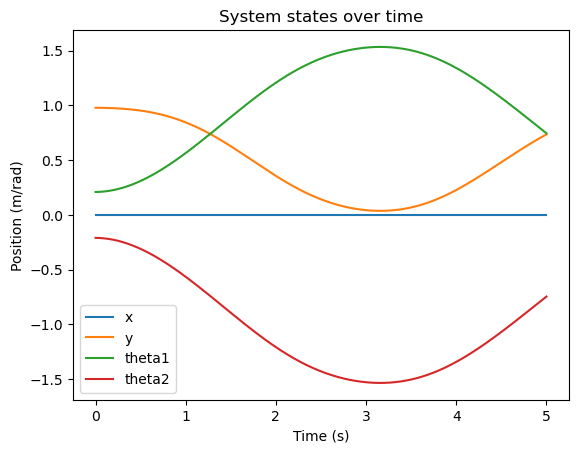

In [12]:
timestamp = np.linspace(0, 5, traj.shape[1])
print(traj.shape)
plt.plot(timestamp, traj[0, :], label='x')
plt.plot(timestamp, traj[2, :], label='y')
plt.plot(timestamp, traj[4, :], label='theta1')
plt.plot(timestamp, traj[6, :], label='theta2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m/rad)')
plt.title('System states over time')
plt.show()

In [17]:
def animate_leg_frames(state_array, L1=1, L2=1, W1=0.2, W2=0.2, T=10):
    """
    Function to generate web-based animation of two connected rectangular legs
    
    Parameters:
    ================================================
    state_array:
        trajectory of [x, y, theta1, theta2], should be a NumPy array with
        shape of (4,N) where:
        - x, y: position of the connection point between legs
        - theta1: angle from y-axis for leg 1 (CCW positive)
        - theta2: angle from y-axis for leg 2 (CCW negative)
    """
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go
    import numpy as np

    # Browser configuration
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    # Extract state variables
    x = state_array[0]  # Connection point
    y = state_array[1]
    theta1 = state_array[2]
    theta2 = state_array[3]
    N = len(x)

    def get_leg_corners(xc, yc, length, width, theta):
        """Calculate leg corners in consistent order"""
        # Direction vector along leg
        dx = np.sin(theta)
        dy = -np.cos(theta)
        
        # Normal vector (rotated 90° CCW)
        nx = -dy
        ny = dx
        
        # Corner points relative to center
        corners_x = [
            xc + (length/2)*dx + (width/2)*nx,  # Front right
            xc + (length/2)*dx - (width/2)*nx,  # Front left
            xc - (length/2)*dx - (width/2)*nx,  # Back left
            xc - (length/2)*dx + (width/2)*nx,  # Back right
            xc + (length/2)*dx + (width/2)*nx   # Close polygon
        ]
        
        corners_y = [
            yc + (length/2)*dy + (width/2)*ny,  # Front right
            yc + (length/2)*dy - (width/2)*ny,  # Front left
            yc - (length/2)*dy - (width/2)*ny,  # Back left
            yc - (length/2)*dy + (width/2)*ny,  # Back right
            yc + (length/2)*dy + (width/2)*ny   # Close polygon
        ]
        
        return corners_x, corners_y

    # Compute leg positions
    leg1_x_coords = []
    leg1_y_coords = []
    leg2_x_coords = []
    leg2_y_coords = []
    
    for i in range(N):
        # First leg (red)
        # Calculate center of leg 1 (point B)
        xB = x[i] + L1/2 * np.sin(theta1[i])
        yB = y[i] - L1/2 * np.cos(theta1[i])
        
        # Get corners for leg 1
        leg1_x, leg1_y = get_leg_corners(xB, yB, L1, W1, theta1[i])
        leg1_x_coords.append(leg1_x)
        leg1_y_coords.append(leg1_y)
        
        # Second leg (blue)
        # Calculate center of leg 2 (point E)
        xE = x[i] + L2/2 * np.sin(theta2[i])
        yE = y[i] - L2/2 * np.cos(theta2[i])
        
        # Get corners for leg 2
        leg2_x, leg2_y = get_leg_corners(xE, yE, L2, W2, theta2[i])
        leg2_x_coords.append(leg2_x)
        leg2_y_coords.append(leg2_y)

    # Define data structure
    data = [
        dict(
            x=[0],  # Dummy data, will be updated in frames
            y=[0],
            mode='lines',
            fill='toself',
            name='Leg 1',
            line=dict(color='red', width=2)
        ),
        dict(
            x=[0],  # Dummy data, will be updated in frames
            y=[0],
            mode='lines',
            fill='toself',
            name='Leg 2',
            line=dict(color='blue', width=2)
        ),
        dict(
            x=[0],  # Dummy data, will be updated in frames
            y=[0],
            mode='markers',
            name='Joint',
            marker=dict(color='black', size=8)
        )
    ]

    # Axis limits
    margin = max(L1, L2) + 1
    xm = min(x) - margin
    xM = max(x) + margin
    ym = min(y) - margin
    yM = max(y) + margin

    # Layout
    layout = dict(
        autosize=False, width=1000, height=1000,
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False, dtick=1),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False, scaleanchor="x", dtick=1),
        title='Two-Leg Animation',
        hovermode='closest',
        updatemenus=[{
            'type': 'buttons',
            'buttons': [
                {'label': 'Play', 'method': 'animate',
                 'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                {'args': [[None], {'frame': {'duration': T, 'redraw': False},
                                 'mode': 'immediate', 'transition': {'duration': 0}}],
                 'label': 'Pause', 'method': 'animate'}
            ]
        }]
    )

    # Frames
    frames = []
    for k in range(N):
        frame_data = [
            dict(
                x=leg1_x_coords[k],
                y=leg1_y_coords[k],
                mode='lines',
                fill='toself',
                line=dict(color='red', width=2)
            ),
            dict(
                x=leg2_x_coords[k],
                y=leg2_y_coords[k],
                mode='lines',
                fill='toself',
                line=dict(color='blue', width=2)
            ),
            dict(
                x=[x[k]],
                y=[y[k]],
                mode='markers',
                marker=dict(color='black', size=8)
            )
        ]
        frames.append(dict(data=frame_data))

    # Create and show figure
    figure = dict(data=data, layout=layout, frames=frames)
    iplot(figure)

In [18]:
# pick out 0, 1, 3, 5th elements of traj
traj_anim = np.zeros((4, 500))
traj_anim[0, :] = traj[0, :]
traj_anim[1, :] = traj[2, :]
traj_anim[2, :] = traj[4, :]
traj_anim[3, :] = traj[6, :]

# Create animation
animate_leg_frames(traj_anim, L1=1, L2=1, W1=0.2, W2=0.2, T=5)